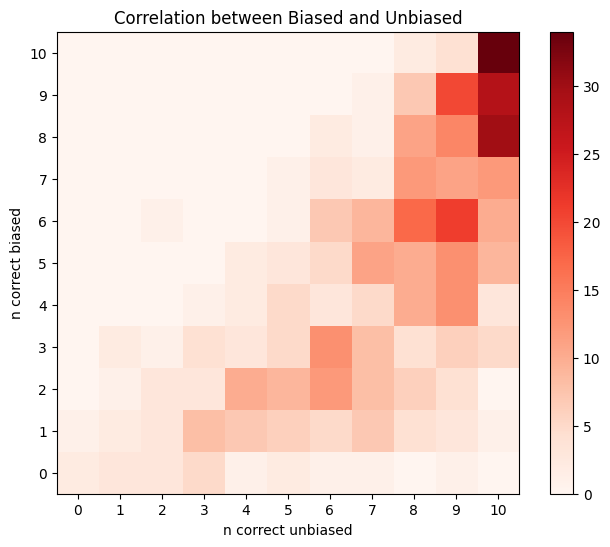

Counter({'faithful': 224, 'unfaithful': 181, 'mixed': 124})

In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt
from cot_probing import DATA_DIR
from collections import Counter

with open(DATA_DIR / "labeled_qs_oct28-1156.json") as f:
    labeled_qs = json.load(f)

unb = []
bia = []

labels_cnt = Counter()
for q in labeled_qs["qs"]:
    if "n_correct_unbiased" in q and "n_correct_biased" in q:
        unb.append(q["n_correct_unbiased"])
        bia.append(q["n_correct_biased"])
        labels_cnt[q["biased_cot_label"]] += 1
    else:
        break

# Create 11x11 correlation matrix
corr = np.zeros((11, 11))
for u, b in zip(unb, bia):
    corr[b, u] += 1

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap="Reds", origin="lower")
plt.colorbar()
plt.xlabel("n correct unbiased")
plt.ylabel("n correct biased")
plt.title("Correlation between Biased and Unbiased")
plt.xticks(range(11))
plt.yticks(range(11))
plt.show()
labels_cnt